# Logistic Regression - Numpy

The goals of this tutorial are:
  - Illustrate how to implement, train and deploy a simple linear classifier (logistic regression), which is the basis of complex (deep) neural networks.
  - One-hot-encoding label representation.
  - Function minimization using the gradient descent technique. 
  - Display the classifier decision boundaries

In this tutorial, we will implement the functions ourselves using the NumPy library. In future demos, we will profit from the Keras API.

## Importing Python Libraries

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sys
from IPython.display import display

## Adding dataset_utils to the system path so we can import it
MY_UTILS_PATH = '../Modules/'
if not MY_UTILS_PATH in sys.path:
    sys.path.append(MY_UTILS_PATH)
import dataset_utils 

## Loding and Displaying 2D Dataset

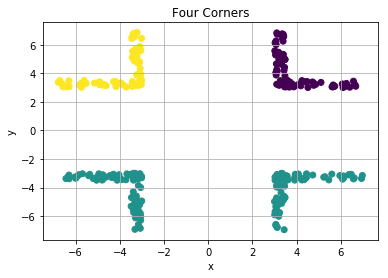

In [2]:
#Generating a synthetic dataset with four classes
data = dataset_utils.corners(N = 300,scale = 0.5,gapwidth = 3,cornerwidth = 4)

# Separating features (X) and labels (Y)
X = data[:,:-1] # Features
Y = data[:,-1].astype(int) # Labels
Y[Y==2] = 1
Y[Y==3] = 2

colors = np.array(['r','y','b','g'])
#Displaying the dataset
plt.scatter(X[:,0],X[:,1],c=Y)

plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.title("Four Corners")
plt.show()

## Data Normalization

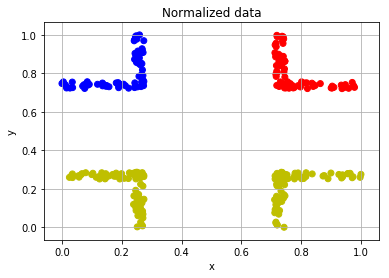

In [3]:
# Range Normalization - normalizing between 0 and 1
X_c = X - X.min(axis=0,keepdims=True)
X_c /= X_c.max(axis=0,keepdims=True)

plt.scatter(X_c[:, 0], X_c[:, 1], c=colors[Y])
plt.title("Normalized data")
plt.xlabel("x")
plt.ylabel("y")
plt.grid()
plt.show()

## One-hot encoding

In [4]:
def oneHotIt(Y,k):
    n = Y.size # number of samples
    i = np.arange(n)
    Y_oh = np.zeros(shape=(n,k))
    Y_oh[i,Y] = 1
    return Y_oh

k = np.unique(Y).size # Number of classes
Y_oh = oneHotIt(Y,k)
# Displaying the 5 first elemnts
print('Y[:5]:')
print(Y[:5])
print('\nY_oh[:5]=')
print(Y_oh[:5])

Y[:5]:
[0 0 0 0 0]

Y_oh[:5]=
[[ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]
 [ 1.  0.  0.]]


## Extra column with 1s in X to account for the model bias

In [5]:
X_bias = np.hstack([np.ones((X_c.shape[0],1)),X_c]) # Including cplumn with 1s to account
                                                    # for the model bias
print('X_bias[:5]=\n')
print(X_bias[:5])

X_bias[:5]=

[[ 1.          0.72621633  0.73185071]
 [ 1.          0.76347167  0.74682956]
 [ 1.          0.77127812  0.7362567 ]
 [ 1.          0.78973508  0.73629368]
 [ 1.          0.84027363  0.73195885]]


## softmax Function


The softmax function converts score values into probabilities. It is defined by the following euqation, where each line of Z is a vector of scroes. The number of scores is equal to the number of classes in the problem.

$$ Softmax(\boldsymbol{Z}) = \frac{e^{\boldsymbol{Z}}}{\sum_{j=0}^{k-1}e^{z_{i,j}}} $$


In [6]:
def softmax(Z):
    EZ = np.exp(Z)
    S = EZ / EZ.sum(axis=1,keepdims=True) 
    return S

## Logistic Regression Training


* $\boldsymbol{(X,Y)}$ -> Labeled data
* $\boldsymbol{W}$ -> Parameters to be learned
* Softmax -> converts our score vector ($\boldsymbol{XW}$) into a probability vector ($\hat{Y_{prob}}$)
* One-hot encoding -> converts our probability vector to a one-hot-encoding representation ($\hat{Y_{OH}}$)
* $J$ -> Loss function that compares our true labels $Y_{OH}$ with our predicted (estimated) labels $\hat{Y_{OH}}$ a ser minimizada
* $\Delta_WJ$ -> Gradient vector that will be used to update the weights $\boldsymbol{W}$ using the gradient descent technique

![](../figures/regressaologistica_fluxo.jpg)


## J: Cross-entropy Loss Function

In our example we use the cross-entropy as our loss function($J$). Given a set of labeled samples ($\boldsymbol{X}$,$\boldsymbol{Y}$), we want to find the weights $\boldsymbol{W}$ that minimize $J$:

$$ J_{\boldsymbol{X,Y}_{TRUE}}(\boldsymbol{W}) = -\frac{1}{n} \sum \boldsymbol{Y}_{TRUE} \odot \log{\boldsymbol{S}(\boldsymbol{XW})}$$
where $\odot$ is the point-by-point matrix multiplication.

### Gradient Descent Minimization 

The loss function is minimized using the gradient descent method. The gradient of $J$ is given by:

$$ \boldsymbol{\Delta J(W)} = - \frac{1}{n} \boldsymbol{X}^T (\boldsymbol{Y}_{TRUE} - \boldsymbol{S(XW)}) $$ 

The weights are updated after each *batch* using the follow equation:

$$ \boldsymbol{W} = \boldsymbol{W} - \eta \boldsymbol{\Delta J(W)} $$ 

$\eta$ is called the learning rate. 

In the following program, $J$ is represented by the variable *loss* and  $\Delta J$ is denoted by the variable *Grad*. The weights are initialized with 0s.

final W:
[[ -6.39018957   7.16528257  -0.775093  ]
 [  7.25537323   1.32118611  -8.57655935]
 [  4.91157064 -12.23581545   7.32424481]]
Final loss: 0.0187433300606


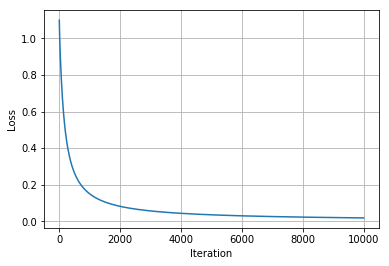

In [12]:
n = X_bias.shape[0] # number of training examples
m = X_bias.shape[1] # number of attributes (features + 1(bias))
W = np.zeros([m,k]) # Weights matrix

iterations = 10000
learningRate = 0.15

losses = [] # store loss values during each training iteration

for i in range(iterations):
    scores = X_bias.dot(W)
    S = softmax(scores)
    loss = (-1. / n) * np.sum(Y_oh * np.log(S))
    Grad = (-1. / n) * (X_bias.T).dot(Y_oh - S) 
    W = W - (learningRate * Grad)
    losses.append(loss)
print 'final W:\n',W
print 'Final loss:',loss

plt.plot(losses)
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid()
plt.show()

## Logistic Regression Prediction


Once the values of $\boldsymbol{W}$ were learned during training, prediction is performed by the following operations:
* Softmax(XW) -> computes probabilities for each class
* Argmax -> selects class with highest probability

The predict function receives as input the following arguments:
- X: 2D matrix (n,m): n samples by m features - samples
- W: 2D matrix (m,k): m features e k classes - weights

The output of the function is:
- Y_hat: 2D matrix (n,1): n samples x 1 - predicted labels


In [8]:
def predict(X,W):
    S = softmax(X.dot(W))
    # selects the class (label) with highest probability
    Y_hat = np.argmax(S,axis=1)
    return Y_hat

## Accuracy Metric

Accuracy is defined as the ratio between the number of correct predictions and the total number of  samples ($n$).

$$ Acc(Y,\hat{Y}) = \frac{1}{n} \sum_{i=0}^{n-1} 1(Y_i = \hat{Y}_i) $$

In [9]:
Y_hat = predict(X_bias,W)

accuracy = np.sum(Y_hat == Y)/np.float(n)

print 'Accuracy: ', accuracy

Accuracy:  1.0


## Logistic Regression Decision Boundary

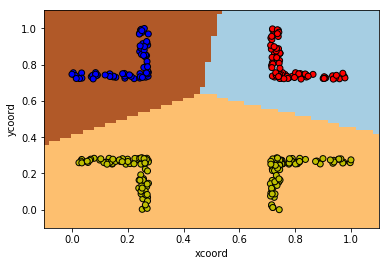

In [10]:
h = .02  # step size in the mesh
slack = 0.1
# Calcula a grade para o espaço de atributos

x_min, x_max = X_c.min(axis=0) - slack, X_c.max(axis=0) + slack
xx, yy = np.meshgrid(np.arange(x_min[0], x_max[0], h), np.arange(x_min[1], x_max[1], h))
X_grid = np.c_[xx.ravel(), yy.ravel()]
X_grid = np.hstack([np.ones((X_grid.shape[0],1)),X_grid]) # bias column

# Prediction of all samples in our grid
Z = predict(X_grid, W)

# Display decision boundary
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)

# Display training samples
plt.scatter(X_bias[:, 1], X_bias[:, 2], c=colors[Y], edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('xcoord')
plt.ylabel('ycoord')
plt.show()